<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **P2S1 2024S1 ECM514 LAB - Ciência de Dados**

Nesta avaliação você terá a oportunidade de empregar o que aprendeu até aqui para fazer transformações, analisar dependências e correlações, trabalhar com distribuições e muito mais em diferentes casos de uso reais.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_ind
import scipy.stats as stats
from scipy.stats import chi2_contingency

from IPython.display import IFrame

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/'

# **CASO: CO₂ and Greenhouse Gas Emissions**

Os dados de emissões de CO₂ e temperatura Global podem ser obtidos no site abaixo. Mas já estão pré-tratados abaixo.



In [2]:
IFrame('https://ourworldindata.org/co2-and-greenhouse-gas-emissions', width=1000, height=300)

In [9]:
df1 = pd.read_csv(path + 'temperature-anomaly.csv')
df1 = df1[df1.Entity == 'Global']
df1 = df1.iloc[:,2:4]
df1.columns = ['year','temperature']
df1.head()

,year,temperature
0,1850,-0.417711
1,1851,-0.233350
2,1852,-0.229399
3,1853,-0.270354
4,1854,-0.291521


In [10]:
df2 = pd.read_csv(path + 'co-emissions-per-capita.csv')
df2 = df2[ df2.Entity.isin(['Brazil','World','China','United States','Europe (excl. EU-28)']) ].reset_index(drop=True)
df2 = df2.iloc[:,[0,2,3]]
df2.columns = ['country', 'year','co2']
df2.head()

,country,year,co2
0,Brazil,1901,0.113905
1,Brazil,1902,0.132818
2,Brazil,1903,0.126605
3,Brazil,1904,0.133064
4,Brazil,1905,0.139196


# Q1.a. (Tarefa) (2.0)

Faça um gráfico o mais próximo possível do gráfico abaixo e **poste a figura do seu gráfico no Canvas na tarefa correspondente**.

Tenha atenção aos seguintes pontos do gráfico:

1. Escalas para o eixo y
2. Preenchimento de áreas de interesse
3. Inclusões de texto
4. Uso de transparência nas cores
5. Proporções dos fontes

Você não precisa se preocupar em reproduzir as cores exatas. Sugestão: empregue o `seaborn` e uma figura `figsize=(12,4)`.

<ipython-input-27-8db3da2a1520>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


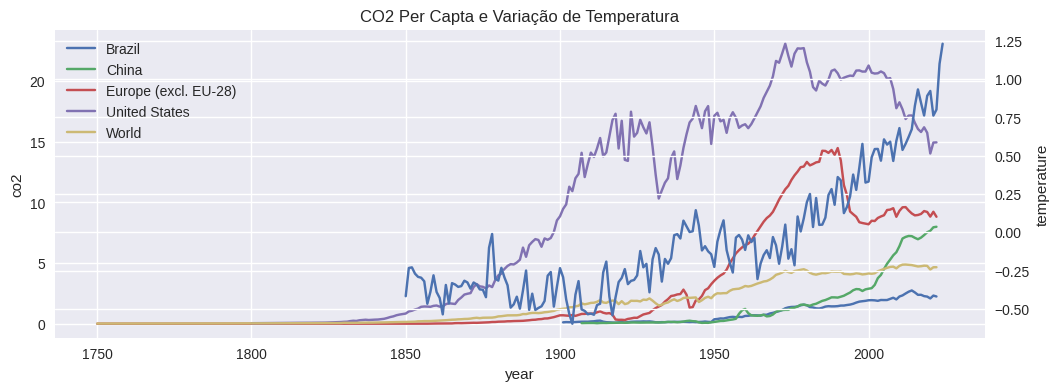

In [27]:
# seu código

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12,4))
plt.title("CO2 Per Capta e Variação de Temperatura")
for country in df2["country"].unique():
  sns.lineplot(x=df2[df2["country"] == country]["year"], y=df2[df2["country"] == country]["co2"], label=country)
ax.twinx()
sns.lineplot(df1,x=df1["year"], y=df1["temperature"])
plt.show()

In [28]:
fig.savefig("Q1a.png")

from google.colab import files
files.download("Q1a.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q1.b. (1,0)


Avalie **para os dados a partir de 1990 (inclusive)** a correlação entre as emissões de cada país e a temperatura através do coeficiente de `pearson`, incluindo sua significância, e responda ao teste correspondente no questionário do Canvas.

In [77]:
# seu código
dfco21990 = df2[df2["year"] >= 1990]
dftemp1990 = df1[df1["year"] >= 1990]

In [ ]:
countries = ["Brazil", "World", "China", "United States", "Europe (excl. EU-28)"]
for country in countries:
    df_country = dfco21990[dfco21990["country"] == country]
    df_year_temp = dftemp1990[dftemp1990["year"].isin(df_country["year"])]["temperature"]
    corr, p_value = stats.pearsonr(df_country["co2"], df_year_temp)
    print(f"{country}: coeficiente de pearson = {corr:.3f}, p-value = {p_value:.3f}")



Brazil: coeficiente de pearson = 0.760, p-value = 0.000
World: coeficiente de pearson = 0.724, p-value = 0.000
China: coeficiente de pearson = 0.856, p-value = 0.000
United States: coeficiente de pearson = -0.817, p-value = 0.000
Europe (excl. EU-28): coeficiente de pearson = -0.335, p-value = 0.057


# **CASO: Titanic Survivals**

Os dados do acidente do Titanic são até hoje uma das maiores fontes de dados para correlacionar fatores de sobrevivência do ser humano a desastres. A seguir você vai fazer análise de alguns desses fatores.





In [82]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Analise aqui a **influência da classe (pclass) de embarque do passageiro na sua sobrevivência.** Veja e responda ao teste correspondentes no Canvas.


# Q2.a. (0,5)

Qual o teste de hipótese mais adequado para análise da influência da classe (pclass) de embarque do passageiro na sua sobrevivência?

T-statistic: -3.4795576697001755
P-value: 0.0006299945448858168


# Q2.b. (1,0)

Qual o resultado do teste de hipótese mais adequado para análise da influência da classe (pclass) de embarque do passageiro na sua sobrevivência?

In [99]:
observed = pd.crosstab(df['pclass'], df['survived'])

chi2, p, dof, expected = chi2_contingency(observed)

print('Chi-squared statistic:', chi2)
print('P-value:', p)
print('Degrees of freedom:', dof)

T-statistic: -3.4795576697001755
P-value: 0.0006299945448858168


Analise aqui a **dependência da sobrevivência dos passageiros com relação a idade** dos passageiros. Veja e responda ao teste correspondentes no Canvas.


# Q2.c. (0,5)

Qual o teste de hipótese mais adequado para análise da influência da idade do passageiro na sua sobrevivência? Você pode assumir que a **idade tem distribuição normal**.

In [ ]:
# t de student

# Q2.d. (1,0)

Qual o resultado do teste de hipótese mais adequado para análise da influência da idade do passageiro na sua sobrevivência?

**Importante**: Elimine se necessário dados ausentes de `age`, mas somente de `age`.

In [100]:
survivors = df[df['survived'] == 1].dropna()
non_survivors = df[df['survived'] == 0].dropna()

survivors_age = survivors['age']
non_survivors_age = non_survivors['age']

t_statistic, p_value = ttest_ind(survivors_age, non_survivors_age)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: -3.4795576697001755
P-value: 0.0006299945448858168


# Q2.e. (1,0)

Verifique agora a influência da idade maior ou menor do passageiro na sua sobrevivência? Qual o resultado do seu teste?



In [104]:
# seu código

import pandas as pd
import scipy.stats as stats

contingency_table = pd.crosstab(df['age'] > df['age'].mean(), df['survived'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected)

Chi-square statistic: 0.9502176064558696
P-value: 0.3296639136508691
Degrees of freedom: 1
Expected values: [[345.66666667 215.33333333]
 [203.33333333 126.66666667]]


# **CASO: CNN news**

Vamos retomar o caso dos dados de comentários de notícias postados pelo canal CNN. **Deve ser útil para você acessar a solução da P1 aqui, onde vimos este caso antes.**

Vamos considerar somente os posts com as palavras `['Biden','Trump','Ukraine','Russia','US']`.

In [105]:
df = pd.read_csv(path + 'Cleaned_cnn_comments.csv')
df.head()

,comment_text,likes,comment_time
0,"Just like US did not abandon Vietnam, Iraq, Af...",73,7200.0
1,Anybody else getting tired of these people spe...,193,7200.0
2,"""If two fish are fighting in a river an Englis...",45,7200.0
3,"""Not abandon"" is not equal to ""Defend/no fly-z...",7,7200.0
4,It's time we pray that our world leaders get a...,52,7200.0


In [111]:
def word_exist(x):
  for word in ['Biden','Trump','Ukraine','Russia','US']:
    if x.count(word) > 0:
      return word
  return None

df['word'] = df.comment_text.apply(lambda x: word_exist(x))

df = df[ df['word'] != None ].reset_index(drop=True)
df.groupby('word').word.count().sort_values(ascending=False)

word
Trump      1162
Ukraine     881
Russia      575
US          418
Biden       289
Name: word, dtype: int64

# Q3.a. (0,5)

Qual o teste de hipótese mais adequado para análise das quantidades de Likes (isto é, se são significativamente iguais ou diferentes em algum sentido) entre comentários postados de duas classes diferentes, por exemplo `Biden` e `Trump`?

# Q3.b. (1,0)

Quais os resultados dos teste de hipótese mais adequado para análise das quantidades de Likes (isto é, se são significativamente iguais ou diferentes em algum sentido) entre comentários postados abaixo?

* posts Ukraine $\times$ Russia

* posts US $\times$ Russia

In [140]:
# seu código

ukraine_likes = df[df['word'] == 'Ukraine']['likes']
russia_likes = df[df['word'] == 'Russia']['likes']
us_likes = df[df['word'] == 'US']['likes']
russia_likes = russia_likes.apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x))
us_likes = us_likes.apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x))
ukraine_likes = ukraine_likes.apply(lambda x: float(x.replace('K', '')) * 1000 if 'K' in x else float(x))
t_statistic, p_value = stats.mannwhitneyu(ukraine_likes, russia_likes)

print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")

t_statistic, p_value = stats.mannwhitneyu(us_likes, russia_likes)

print(f"T-statistic: {t_statistic:.3f}, P-value: {p_value:.3f}")

T-statistic: 284900.500, P-value: 0.000
T-statistic: 124174.500, P-value: 0.350


# **CASO: Manutenção de Peças**

A distribuição de Weibull (`weibull_min`) representa a probabilidade de falha de peças com desgaste e é amplamente empregada na indústria para prever manutenções.



# Q4.a. (Tarefa) (0,5)

Crie uma distribuição de Weibull (`weibull_min`) com o parâmetro `c = 1.7` (tempo em anos) e faça um gráfico o mais próximo possível do gráfico abaixo das curvas de distribuição. **Poste a figura do seu gráfico no Canvas na tarefa correspondente**.

Você não precisa se preocupar em reproduzir as cores exatas. Sugestão: empregue o `seaborn` e uma figura `figsize=(12, 4)`.

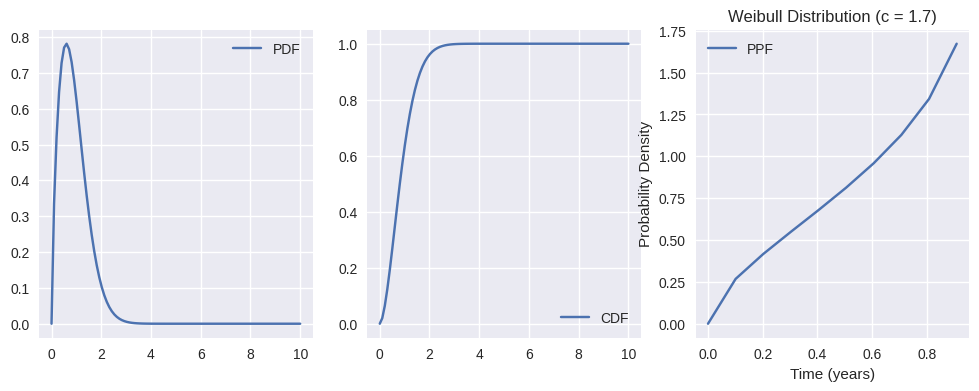

In [ ]:
c = 1.7  # shape parameter
scale = 1  # scale parameter

x = np.linspace(0, 10, 100)
pdf = stats.weibull_min.pdf(x, c=c, scale=scale)
ppf = stats.weibull_min.ppf(x, c=c, scale=scale)
cdf = stats.weibull_min.cdf(x, c=c, scale=scale)
fig, ax = plt.subplots(1,3, figsize=(12, 4))
sns.lineplot(x=x, y=pdf, label='PDF', ax=ax[0])
sns.lineplot(x=x, y=cdf, label='CDF', ax=ax[1])
sns.lineplot(x=x, y=ppf, label='PPF', ax=ax[2])

plt.title('Weibull Distribution (c = 1.7)')
plt.xlabel('Time (years)')
plt.ylabel('Probability Density')

plt.show()



In [147]:
fig.savefig("Q4a.png")

from google.colab import files
files.download("Q4a.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Q4.b. (0,5)

Considerando a distribuição Weibull(1.7), qual a probabilidade de uma peça não apresentar problemas depois de 2 anos?


In [156]:
c = 1.7  # shape parameter
scale = 1  # scale parameter

probability = stats.weibull_min.cdf(2, c=c, scale=scale)

print(f"Probabilidade de não ter falha: {1 -probability:.3f}")


Probabilidade de não ter falha: 0.039


# Q4.c. (0,5)

Considerando a distribuição Weibull(1.7), qual a probabilidade de uma peça apresentar problemas entre 1 e 2 anos?


In [155]:
c = 1.7  # shape parameter
scale = 1  # scale parameter

probability_before_1 = weibull_min.cdf(1, c=c, scale=scale)
probability_before_2 = weibull_min.cdf(2, c=c, scale=scale)

probability_between_1_and_2 = probability_before_2 - probability_before_1

print(f"Probabilidade de falha entre 1 e 2 anos: {probability_between_1_and_2:.3f}")


Probabilidade de falha entre 1 e 2 anos: 0.329


# Q4.d. (0,5)

Considerando a distribuição Weibull(1.7), na aquisição e começo de uso das peças você compra 25% de peças adicionais para substituição. Até quando esse estoque de peças deve atender as trocas necessárias tendo que programar a próxima compra de estoques?

In [154]:
# seu código
c = 1.7  # shape parameter
scale = 1  # scale parameter

prob_failure_1_2 = weibull_min.cdf(2, c=c, scale=scale) - weibull_min.cdf(1, c=c, scale=scale)

num_pieces = 0.25

time_to_deplete = weibull_min.ppf(1 - num_pieces / prob_failure_1_2, c=c, scale=scale)

print(f"Tempo para esgotar o estoque: {time_to_deplete:.3f} anos")


Tempo para esgotar o estoque: 0.468 anos


# **CASO: Temperaturas mensais na Basiléia**

Os dados abaixo coletados de https://www.meteoblue.com/ apresentam as temperaturas mensais de basiléia a partir de 2014.

É comum em séries temporais, como as temperaturas ao longo do ano, ter uma dependência ou correlação (`pearson`) com os valores anteriores da série. A temperatura hoje, por exemplo, está mais correlacionada à temperatura de ontem, e provavelmente menos correlacionada com a temperatura de 60 atrás.



In [ ]:
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel(path + 'dataexport_20240613T041833.xlsx',skiprows=9)
df.set_index('timestamp',inplace=True)
df.columns = ['T']
df = df.resample('M').mean()
df.head()

,T
timestamp,
2014-01-31,4.613095
2014-02-28,5.618519
2014-03-31,8.180178
2014-04-30,12.219051
2014-05-31,14.170581


# Q5.a. (0,5)

Calcule a correlação entre os valores defasados da série, isto é:

$$ pearson(T_t,T_{t-1}) $$
$$ pearson(T_t,T_{t-2}) $$
$$ ... $$
$$ pearson(T_t,T_{t-11}) $$
$$ pearson(T_t,T_{t-12}) $$

Quais os valores de correlação encontrados? Veja que $ pearson(T_t,T_t) = 1$.

**Dica:** empregue a função `.shift()` do `Pandas`.

In [ ]:
# seu código